In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, join_l_ab
import src.consts as c

from skimage import color

In [2]:
tf.__version__

'2.0.0'

In [3]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [4]:
def compare_model_label(model, l, ab):
    plt.figure(figsize=(10, 30))

    plt.subplot(1,3,1)
    plt.imshow(l[:,:,0], cmap=plt.cm.gray)

    plt.subplot(1,3,2)
    plt.imshow(join_l_ab(l, ab), cmap=plt.cm.binary)

    plt.subplot(1,3,3)
    output = model.predict(np.array([l], dtype=float))
    plt.imshow(join_l_ab(l, output), cmap=plt.cm.binary)

    plt.show()

# Training

In [5]:
from src.model.train_model import train_model

TensorBoard(log_dir='/output')
model = train_model()

train images size 8366, valid images size 464, batch_size 16
Train for 5 steps, validate for 5 steps
Epoch 1/500
5/5 [==============================] - 12s 2s/step - loss: 0.0146 - accuracy: 0.4997 - val_loss: 0.0106 - val_accuracy: 0.4426
Epoch 2/500
5/5 [==============================] - 6s 1s/step - loss: 0.0103 - accuracy: 0.5313 - val_loss: 0.0101 - val_accuracy: 0.5649
Epoch 3/500
5/5 [==============================] - 6s 1s/step - loss: 0.0101 - accuracy: 0.5309 - val_loss: 0.0102 - val_accuracy: 0.5444
Epoch 4/500
5/5 [==============================] - 6s 1s/step - loss: 0.0108 - accuracy: 0.5138 - val_loss: 0.0100 - val_accuracy: 0.5668
Epoch 5/500
5/5 [==============================] - 6s 1s/step - loss: 0.0090 - accuracy: 0.5294 - val_loss: 0.0100 - val_accuracy: 0.5716
Epoch 6/500
5/5 [==============================] - 6s 1s/step - loss: 0.0099 - accuracy: 0.5620 - val_loss: 0.0100 - val_accuracy: 0.5462
Epoch 7/500
5/5 [==============================] - 6s 1s/step - loss: 

In [6]:
train_paths, _, test_paths = get_train_valid_test(c.DATASET_PATH)
test_data = create_tf_dataset(test_paths)

In [7]:
model.evaluate(test_data, steps=5)

5/5 [==============================] - 1s 291ms/step - loss: 0.0081 - accuracy: 0.6788


[0.008133751573041081, 0.67875975]

In [8]:
train_gen = image_generator(train_paths)
test_gen = image_generator(test_paths)

## Images from Train set

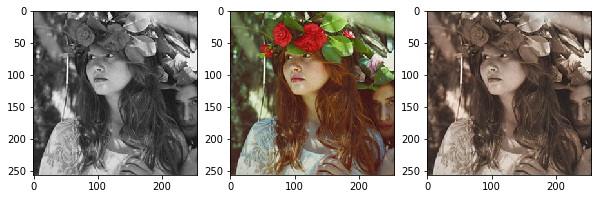

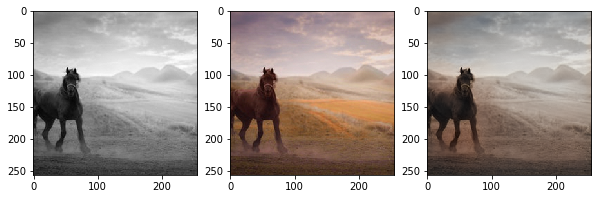

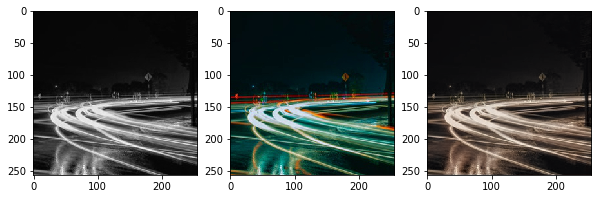

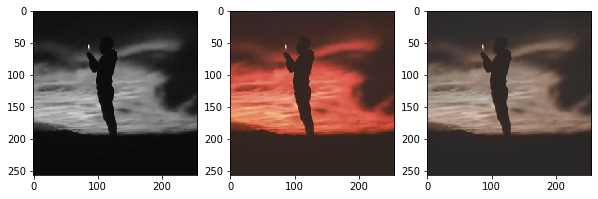

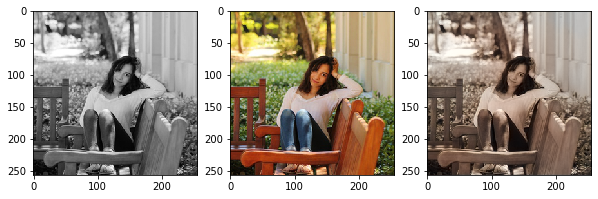

In [9]:
for i in range(5):
    l, ab = next(train_gen)
    compare_model_label(model, l, ab)

## Images from Test set

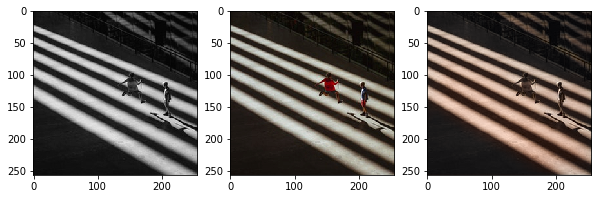

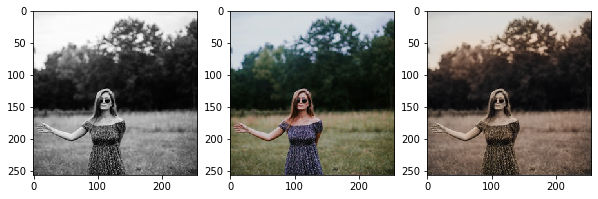

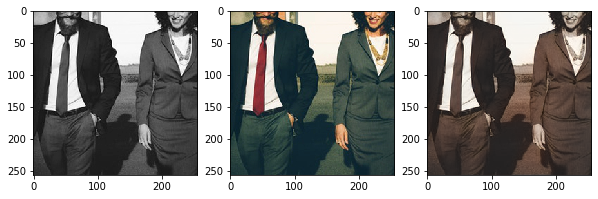

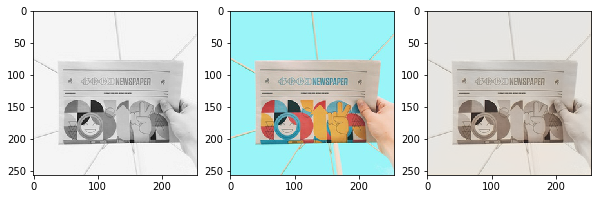

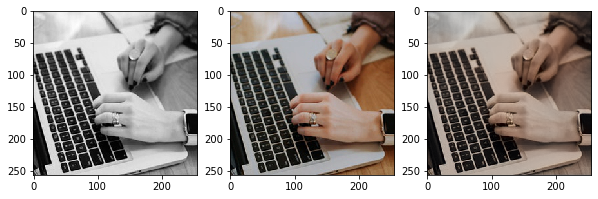

In [10]:
for i in range(5):
    l, ab = next(test_gen)
    compare_model_label(model, l, ab)